In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from calendar import month_name

In [12]:
price_df=pd.read_csv('HistoricalPrices.csv')

In [13]:
price_df

,Date,Open,High,Low,Close
0,11/17/23,34964.82,35028.22,34882.82,34947.28
1,11/16/23,34868.03,35022.46,34818.03,34945.47
2,11/15/23,34906.72,35051.10,34868.48,34991.21
3,11/14/23,34581.20,34931.01,34581.20,34827.70
4,11/13/23,34259.25,34405.84,34205.81,34337.87
...,...,...,...,...,...
59,08/25/23,34217.06,34441.91,34029.22,34346.90
60,08/24/23,34439.83,34694.68,34093.65,34099.42
61,08/23/23,34338.59,34534.72,34321.00,34472.98
62,08/22/23,34494.17,34514.04,34256.84,34288.83


In [14]:
price_df.rename(columns={' Date':'date',' Open':'open',' High':'high',' Low':'low',' Close':'close'},inplace=True)

In [15]:
price_df

,Date,open,high,low,close
0,11/17/23,34964.82,35028.22,34882.82,34947.28
1,11/16/23,34868.03,35022.46,34818.03,34945.47
2,11/15/23,34906.72,35051.10,34868.48,34991.21
3,11/14/23,34581.20,34931.01,34581.20,34827.70
4,11/13/23,34259.25,34405.84,34205.81,34337.87
...,...,...,...,...,...
59,08/25/23,34217.06,34441.91,34029.22,34346.90
60,08/24/23,34439.83,34694.68,34093.65,34099.42
61,08/23/23,34338.59,34534.72,34321.00,34472.98
62,08/22/23,34494.17,34514.04,34256.84,34288.83


In [19]:
price_df['Date']=pd.to_datetime(price_df['Date'])

/tmp/ipykernel_7030/3770244103.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  price_df['Date']=pd.to_datetime(price_df['Date'])


In [16]:
price_df=price_df.sort_values(by='Date')

In [9]:
price_df

,Date,open,high,low,close
63,2023-08-21,34531.28,34570.96,34248.46,34463.69
62,2023-08-22,34494.17,34514.04,34256.84,34288.83
61,2023-08-23,34338.59,34534.72,34321.00,34472.98
60,2023-08-24,34439.83,34694.68,34093.65,34099.42
59,2023-08-25,34217.06,34441.91,34029.22,34346.90
...,...,...,...,...,...
4,2023-11-13,34259.25,34405.84,34205.81,34337.87
3,2023-11-14,34581.20,34931.01,34581.20,34827.70
2,2023-11-15,34906.72,35051.10,34868.48,34991.21
1,2023-11-16,34868.03,35022.46,34818.03,34945.47


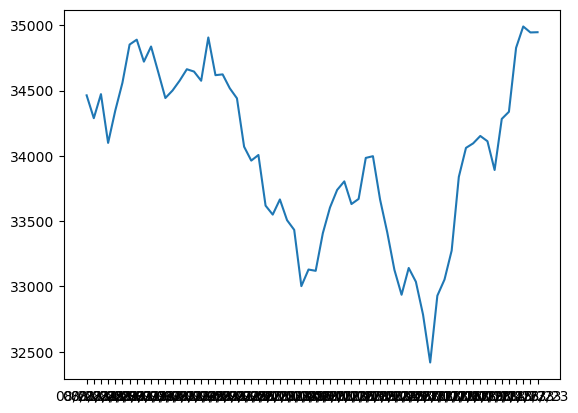

In [18]:
plt.plot(price_df['Date'],price_df['close'])
plt.show()

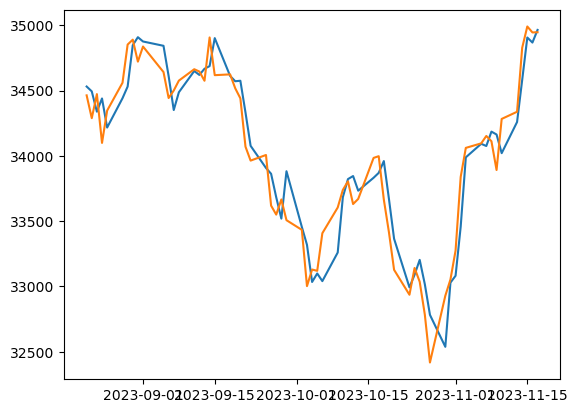

In [20]:
plt.plot(price_df['Date'],price_df['open'])
plt.plot(price_df['Date'],price_df['close'])
plt.show()

# Over the course of the year, we see that the open and close prices of the DJIA were relatively close to each other
# for each given day with no clear pattern of one always being above or below the other.

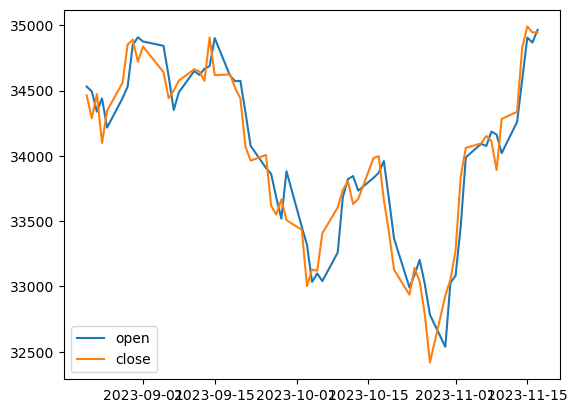

In [21]:
plt.plot(price_df['Date'],price_df['open'],label='open')
plt.plot(price_df['Date'],price_df['close'],label='close')
plt.legend()
plt.show()

In [22]:
# Order by months by chronological order
price_df['Month'] = pd.Categorical(price_df['Date'].dt.month_name(), month_name[1:])

In [23]:
# Group metrics by monthly averages
price_df_monthly_mean = price_df \
    .groupby('Month') \
    .mean() \
    .reset_index()

price_df_monthly_mean.head(6)

,Month,Date,open,high,low,close
0,January,NaT,NaN,NaN,NaN,NaN
1,February,NaT,NaN,NaN,NaN,NaN
2,March,NaT,NaN,NaN,NaN,NaN
3,April,NaT,NaN,NaN,NaN,NaN
4,May,NaT,NaN,NaN,NaN,NaN
5,June,NaT,NaN,NaN,NaN,NaN


In [24]:
price_df

,Date,open,high,low,close,Month
63,2023-08-21,34531.28,34570.96,34248.46,34463.69,August
62,2023-08-22,34494.17,34514.04,34256.84,34288.83,August
61,2023-08-23,34338.59,34534.72,34321.00,34472.98,August
60,2023-08-24,34439.83,34694.68,34093.65,34099.42,August
59,2023-08-25,34217.06,34441.91,34029.22,34346.90,August
...,...,...,...,...,...,...
4,2023-11-13,34259.25,34405.84,34205.81,34337.87,November
3,2023-11-14,34581.20,34931.01,34581.20,34827.70,November
2,2023-11-15,34906.72,35051.10,34868.48,34991.21,November
1,2023-11-16,34868.03,35022.46,34818.03,34945.47,November


In [25]:
# Import the calendar package 
from calendar import month_name

# Order by months by chronological order
price_df['Month'] = pd.Categorical(price_df['Date'].dt.month_name(), month_name[1:])

# Group metrics by monthly averages
price_monthly_mean = price_df \
    .groupby('Month') \
    .mean() \
    .reset_index()

price_monthly_mean.head(6)

,Month,Date,open,high,low,close
0,January,NaT,NaN,NaN,NaN,NaN
1,February,NaT,NaN,NaN,NaN,NaN
2,March,NaT,NaN,NaN,NaN,NaN
3,April,NaT,NaN,NaN,NaN,NaN
4,May,NaT,NaN,NaN,NaN,NaN
5,June,NaT,NaN,NaN,NaN,NaN


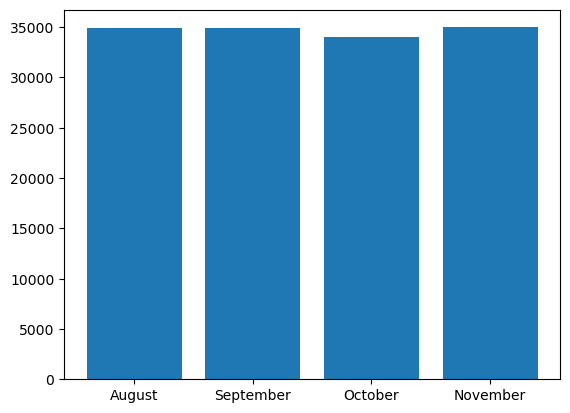

In [26]:
plt.bar(price_df['Month'],height=price_df['close'])
plt.show()

# We see that most of the close prices of the DJIA were close to each other
# with the lowest average close value being in october and the highest average close value being in August.

# sort values

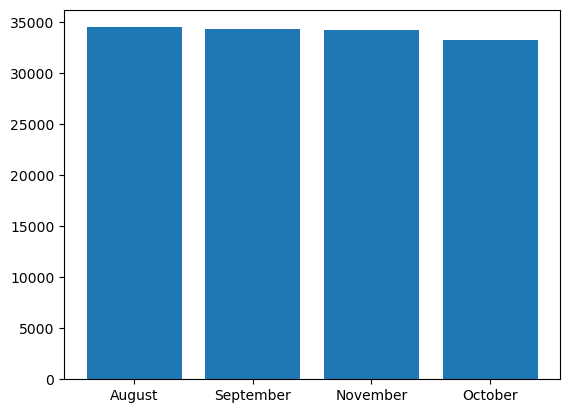

In [27]:
price_monthly_mean_std=price_monthly_mean.sort_values(by = 'close', ascending = False)
plt.bar(price_monthly_mean_std['Month'],height=price_monthly_mean_std['close'])
plt.show()

# horizonatal bar plots

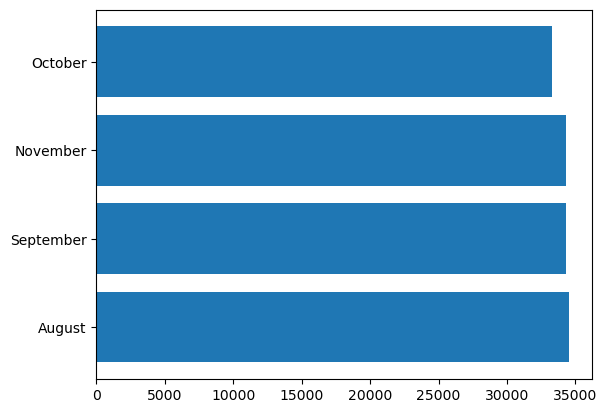

In [28]:
plt.barh(price_monthly_mean_std['Month'],width=price_monthly_mean_std['close'])
plt.show()

# scatter plots

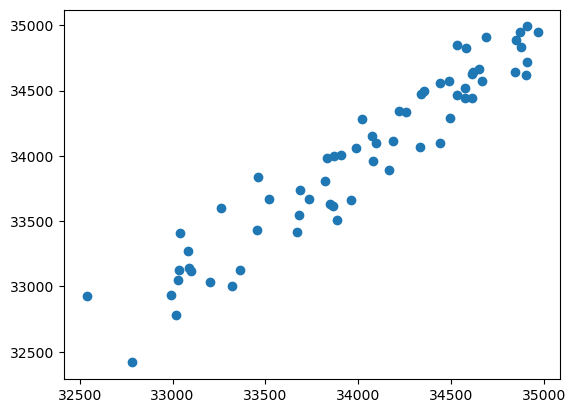

In [30]:
plt.scatter(price_df['open'],price_df['close'])
plt.show()

# trend line

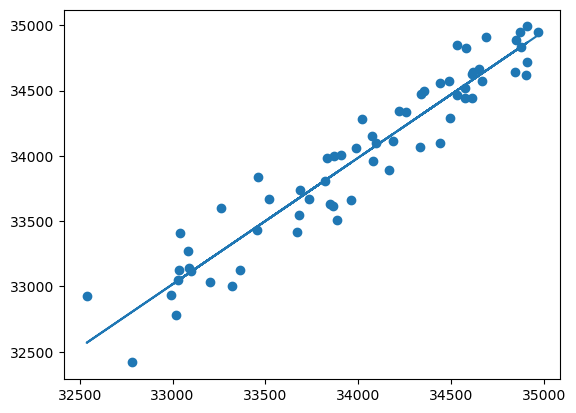

In [31]:
z=np.polyfit(price_df['open'],price_df['close'],1)
p=np.poly1d(z)
plt.scatter(price_df['open'],price_df['close'])
plt.plot(price_df['open'],p(price_df['open']))
plt.show()

# plot title and axis label

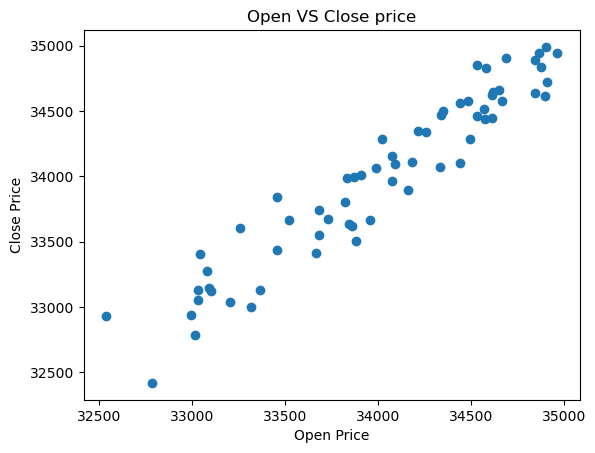

In [32]:
plt.scatter(price_df['open'],price_df['close'])
plt.title('Open VS Close price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

# color

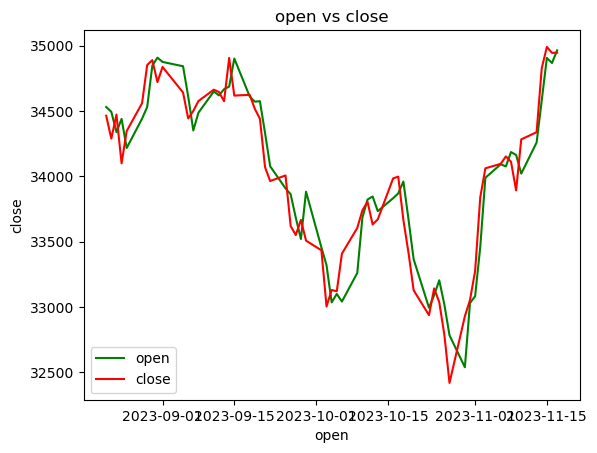

In [33]:
plt.plot(price_df['Date'],price_df['open'],color='green',label='open')
plt.plot(price_df['Date'],price_df['close'],color='red',label='close')
plt.title('open vs close')
plt.xlabel('open')
plt.ylabel('close')
plt.legend()
plt.show()

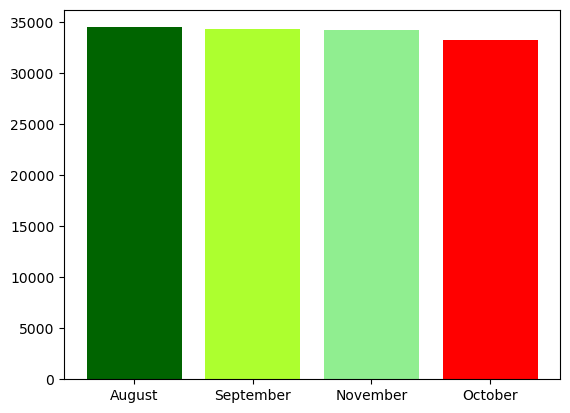

In [34]:
price_monthly_mean_std=price_monthly_mean.sort_values(by = 'close', ascending = False)
plt.bar(price_monthly_mean_std['Month'],height=price_monthly_mean_std['close'],color=['#006400','#ADFF2F','#90EE90','red'])
plt.show()

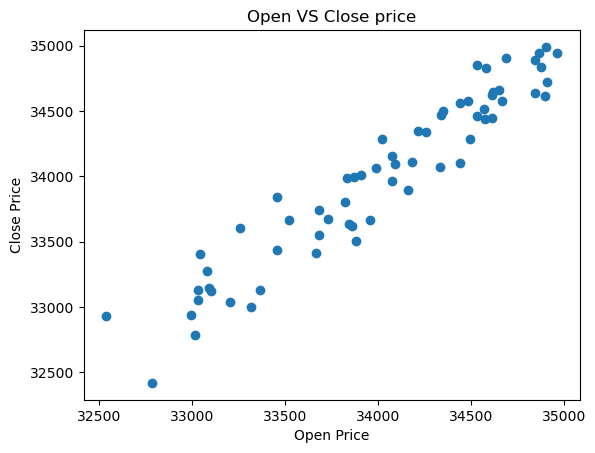

In [35]:
plt.scatter(price_df['open'],price_df['close'])
plt.title('Open VS Close price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

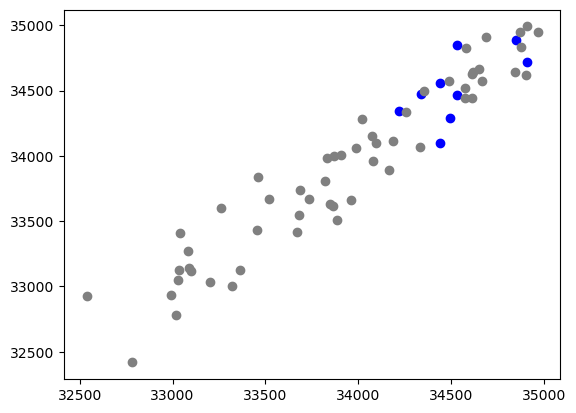

In [36]:
plt.scatter(price_df[price_df['Month'] == 'August']['open'], price_df[price_df['Month'] == 'August']['close'], color = 'blue')

plt.scatter(price_df[price_df['Month'] != 'August']['open'], price_df[price_df['Month'] != 'August']['close'], color = 'gray')

plt.show()

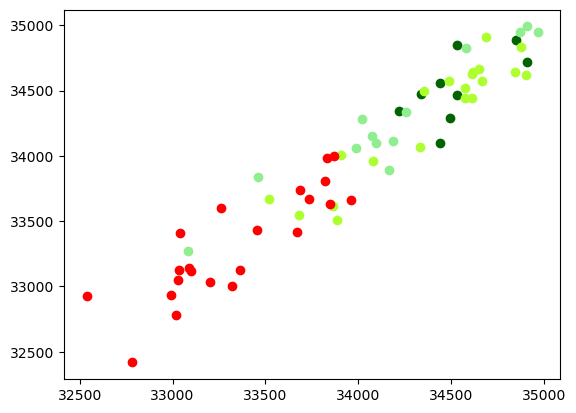

In [38]:
plt.scatter(price_df[price_df['Month'] == 'August']['open'], price_df[price_df['Month'] == 'August']['close'], color = '#006400')

plt.scatter(price_df[price_df['Month'] == 'September']['open'], price_df[price_df['Month'] == 'September']['close'], color = '#ADFF2F')

plt.scatter(price_df[price_df['Month'] == 'November']['open'], price_df[price_df['Month'] == 'November']['close'], color = '#90EE90')

plt.scatter(price_df[price_df['Month'] == 'October']['open'], price_df[price_df['Month'] == 'October']['close'], color = 'red')

plt.show()

# color map

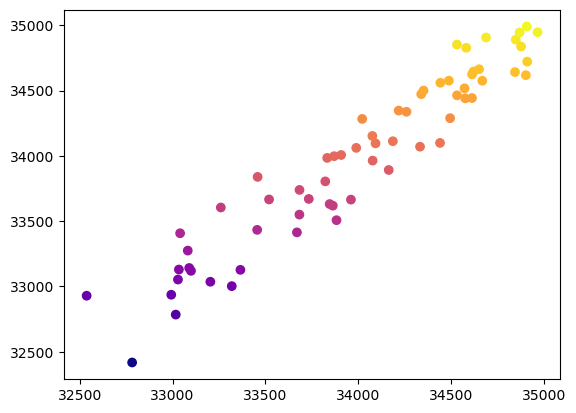

<Figure size 640x480 with 0 Axes>

In [39]:
plt.scatter(price_df['open'], price_df['close'], c=price_df['close'], cmap = plt.cm.plasma)

plt.show()
plt.savefig('open price VS close price.png')